In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import pandas.testing as tm
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [2]:
df = pd.read_csv(r'D:\Masters\DMML\Project\Datasets\Us Cleaned.csv',encoding="ISO-8859-1")

In [3]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,az
1,fayetteville,11900,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,ar
2,florida keys,21000,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,fl
3,worcester / central MA,1500,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,ma
4,greensboro,4900,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324069,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,white,wy
324070,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,12029.0,clean,other,fwd,sedan,red,wy
324071,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,4174.0,clean,other,4wd,hatchback,white,wy
324072,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [4]:
df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '_')

In [5]:
df.describe()

,price,year,odometer
count,324074.000000,324074.000000,324074.000000
mean,16956.434225,2012.035254,89903.849948
std,10751.137771,6.155273,52632.388417
min,300.000000,1980.000000,1000.000000
25%,7900.000000,2009.000000,42784.000000
50%,14995.000000,2013.000000,89000.000000
75%,25000.000000,2017.000000,130863.000000
max,40000.000000,2022.000000,200000.000000


In [6]:
df.shape

(324074, 15)

In [7]:
df.loc[df['price']<=10000,'price class']='low'
df.loc[df['price']>=25000,'price class']='high'
df.loc[(df['price']>10000) & (df['price']<25000),'price class']='mid'

In [8]:
df['price class'].value_counts()

mid     128496
low     114514
high     81064
Name: price class, dtype: int64

In [9]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state', 'price class'],
      dtype='object')

In [10]:
df1=df.groupby('price class').sample(25000)

In [11]:
df1['price class'].value_counts()

high    25000
low     25000
mid     25000
Name: price class, dtype: int64

In [12]:
df2 = df1.copy()

In [13]:
X=df2.iloc[:,:-1]
Y=df2['price class']

In [14]:
X.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
302037,richmond,27990,2008.0,ford,econoline cargo van,good,8 cylinders,gas,83459.0,clean,automatic,rwd,truck,white,va
269290,clarksville,25500,2017.0,dodge,durango,excellent,6 cylinders,gas,82822.0,clean,automatic,4wd,SUV,black,tn
311320,wenatchee,25987,2018.0,ford,escape se,good,6 cylinders,gas,3958.0,clean,other,4wd,hatchback,blue,wa
64116,hartford,30590,2020.0,chevrolet,silverado 1500 regular,good,8 cylinders,gas,17084.0,clean,other,4wd,pickup,white,ct
168004,st cloud,32990,2019.0,audi,q5 premium sport utility 4d,good,6 cylinders,other,31638.0,clean,other,4wd,SUV,white,mn


In [15]:
Y.head()

302037    high
269290    high
311320    high
64116     high
168004    high
Name: price class, dtype: object

In [16]:
X.drop(['price'],axis=1,inplace=True)

In [17]:
X.columns

Index(['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')

In [18]:
X_encoded=pd.get_dummies(X)

In [19]:
X_encoded.head()

,year,odometer,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
302037,2008.0,83459.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
269290,2017.0,82822.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
311320,2018.0,3958.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
64116,2020.0,17084.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168004,2019.0,31638.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X_encoded.columns = X_encoded.columns.str.replace('[^a-zA-Z0-9_]', '_')

In [21]:
duplicate_features = X_encoded.columns[X_encoded.columns.duplicated()]
X_encoded = X_encoded.drop(columns=duplicate_features)

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
label_encoder=LabelEncoder()

In [24]:
Y_encoded=label_encoder.fit_transform(Y)

In [25]:
Y_encoded

array([0, 0, 0, ..., 2, 2, 2])

# Spliting dataset

In [26]:
# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded , Y_encoded, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (60000, 10702)
Shape of testing feature: (15000, 10702)
Shape of training label: (60000,)
Shape of training label: (15000,)


Accuracy on training set: 1.000
Accuracy on validation set: 0.858
F1-score: 0.8569058224831884
[[4559   43  463]
 [  86 4401  429]
 [ 443  673 3903]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5065
           1       0.86      0.90      0.88      4916
           2       0.81      0.78      0.80      5019

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



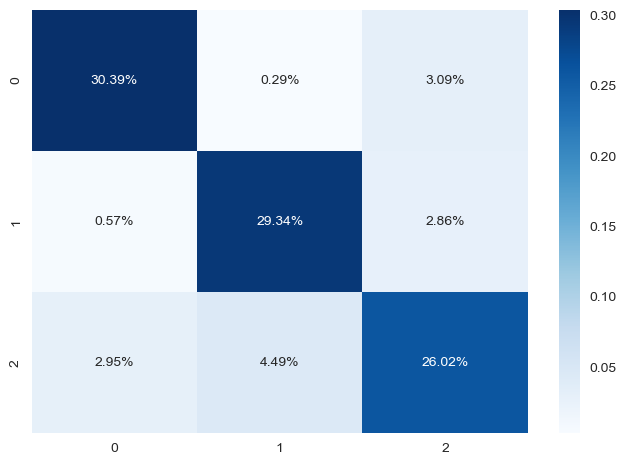

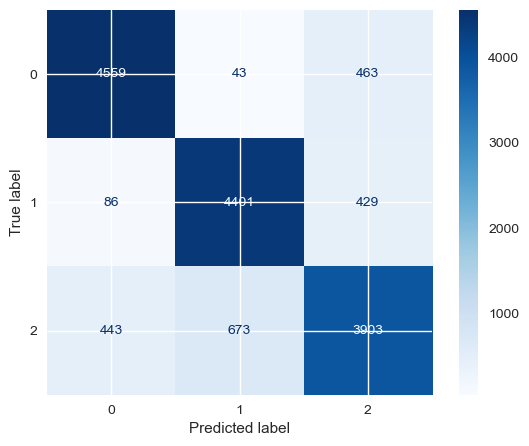

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))

print("Accuracy on validation set: {:.3f}".format(rf.score(X_test, y_test)))

y_pred_rf = rf.predict(X_test)

from sklearn.metrics import confusion_matrix
Confmat_rf = confusion_matrix(y_test,y_pred_rf)
Confmat_rf = sns.heatmap(Confmat_rf/np.sum(Confmat_rf),annot=True, 
            fmt='.2%', cmap='Blues')

from sklearn.metrics import classification_report,confusion_matrix,f1_score
f1_score = f1_score(y_test, y_pred_rf, average='weighted')
print("F1-score:", f1_score)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(rf,X_test,y_test,cmap=plt.cm.Blues)
plt.gcf().set_size_inches(7, 5)

In [28]:
df3 = pd.DataFrame({'Prediction': y_pred_rf})
df3.to_csv(r'D:\Masters\DMML\Project\Predictions\US RF SKL.csv', index = False)

In [29]:
import lightgbm as lgb

# Define the random forest model parameters
rf_params = {
    'boosting_type':'rf', 
    'num_leaves':31, 
    'max_depth':-1,
    'n_estimators':100, 
    'bagging_freq':1, 
    'bagging_fraction':0.8,
    'feature_fraction':0.8, 
    'random_state':42
}

# Initialize the random forest model
rf = lgb.LGBMClassifier(**rf_params)

# Train the random forest model
rf.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score,f1_score
report = classification_report(y_test, rf_pred)
f1_score = f1_score(y_test, rf_pred, average='weighted')
accuracy = accuracy_score(y_test, rf_pred)
print('Classification Report:')
print(report)
print("F1-score:", f1_score)
print('Accuracy:', accuracy)


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79      5065
           1       0.79      0.82      0.81      4916
           2       0.67      0.57      0.62      5019

    accuracy                           0.74     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.74      0.74      0.74     15000

F1-score: 0.7379283254177144
Accuracy: 0.7425333333333334


In [30]:
df4 = pd.DataFrame({'Prediction': rf_pred})
df4.to_csv(r'D:\Masters\DMML\Project\Predictions\US RF LGB.csv', index = False)

Accuracy on training set: 0.760
Accuracy on validation set: 0.650
F1-score: 0.6439959526440843
[[3832  399  834]
 [ 471 3542  903]
 [1335 1312 2372]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72      5065
           1       0.67      0.72      0.70      4916
           2       0.58      0.47      0.52      5019

    accuracy                           0.65     15000
   macro avg       0.64      0.65      0.64     15000
weighted avg       0.64      0.65      0.64     15000



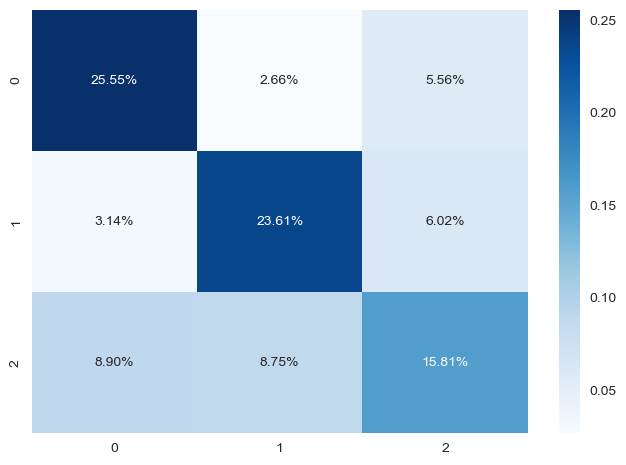

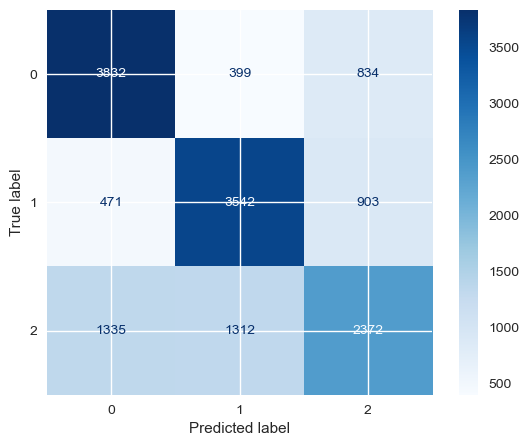

In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))

print("Accuracy on validation set: {:.3f}".format(knn.score(X_test, y_test)))

y_pred_KNN = knn.predict(X_test)

Confmat_KNN = confusion_matrix(y_test,y_pred_KNN)
Confmat_KNN = sns.heatmap(Confmat_KNN/np.sum(Confmat_KNN),annot=True, 
            fmt='.2%', cmap='Blues')

from sklearn.metrics import classification_report,confusion_matrix,f1_score
f1_score = f1_score(y_test, y_pred_KNN, average='weighted')
print("F1-score:", f1_score)
print(confusion_matrix(y_test,y_pred_KNN))
print(classification_report(y_test,y_pred_KNN))

from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(knn,X_test,y_test,cmap=plt.cm.Blues)
plt.gcf().set_size_inches(7, 5)

In [32]:
df5 = pd.DataFrame({'Prediction': y_pred_KNN})
df5.to_csv(r'D:\Masters\DMML\Project\Predictions\US KNN SKL.csv', index = False)

In [33]:
import lightgbm as lgb

# Define the KNN model parameters
knn_params = {
    'boosting_type': 'gbdt',
    'n_neighbors': 5,
    'num_leaves': 31,
    'n_estimators': 100,
    'random_state': 42
}

# Initialize the KNN model
knn = lgb.LGBMClassifier(**knn_params)

# Train the KNN model
knn.fit(X_train, y_train)

# Make predictions on the test set
knn_pred = knn.predict(X_test)


from sklearn.metrics import classification_report, accuracy_score,f1_score
report = classification_report(y_test,knn_pred)
accuracy = accuracy_score(y_test, knn_pred)
f1_score = f1_score(y_test, knn_pred, average='weighted')
print('Classification Report:')
print(report)
print("F1-score:", f1_score)
print('Accuracy:', accuracy)

[LightGBM] [Warning] Unknown parameter: n_neighbors
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      5065
           1       0.85      0.86      0.85      4916
           2       0.75      0.73      0.74      5019

    accuracy                           0.82     15000
   macro avg       0.82      0.82      0.82     15000
weighted avg       0.82      0.82      0.82     15000

F1-score: 0.8176400429245946
Accuracy: 0.8181333333333334


In [34]:
df6 = pd.DataFrame({'Prediction': knn_pred})
df6.to_csv(r'D:\Masters\DMML\Project\Predictions\US KNN LGB.csv', index = False)